# Option-Implied Probability  
This script is inspired by https://reasonabledeviations.com/2020/10/01/option-implied-pdfs/

In [17]:
#import nasdaqdatalink
#raw_sb = nasdaqdatalink.get("CHRIS/CME_BO1")

# Downloaded +/-50 from: https://www.barchart.com/futures/quotes/ZL*0/options?moneyness=20
import pandas as pd
raw_sbo = pd.read_csv('zlf23-options-american-options-exp-12_23_22-50-strikes-intraday-12-03-2022.csv')
raw_sbo

,Strike,High,Low,Last,Change,Bid,Ask,Volume,Open Int,Premium,Last Trade
0,53.000C,12.295,12.295,12.295,-0.980,0.0,0.0,NaN,NaN,7377.0,12/02/22
1,53.000P,0.295,0.090,0.090,-0.115,0.0,0.0,1.0,159.0,54.0,12/02/22
2,53.500C,11.805,11.805,11.805,-0.990,0.0,0.0,NaN,NaN,7083.0,12/02/22
3,53.500P,0.105,0.105,0.105,-0.125,0.0,0.0,NaN,47.0,63.0,12/02/22
4,54.000C,11.320,11.320,11.320,-1.005,0.0,0.0,NaN,NaN,6792.0,12/02/22
...,...,...,...,...,...,...,...,...,...,...,...
96,77.000C,0.110,0.050,0.055,-0.060,0.0,0.0,146.0,682.0,33.0,12/02/22
97,77.000P,11.820,11.820,11.820,0.815,0.0,0.0,NaN,20.0,7092.0,12/02/22
98,77.500C,0.045,0.045,0.045,-0.050,0.0,0.0,NaN,583.0,27.0,12/02/22
99,77.500P,12.310,12.310,12.310,0.820,0.0,0.0,NaN,2.0,7386.0,12/02/22


In [18]:
# Assign Types, Normalize DF (Separate Columns)
def clean_options(df):
    # Fix Types
    import numpy as np
    df = df.replace(np.nan,0)
    df.Volume = df.Volume.astype(int)
    df['Open Int'] = df['Open Int'].astype(int)

    # Separate Columns
    df['Strike Price'] = df.Strike.str.extract('(\d+\.\d+)').astype(float)
    df['Type'] = df.Strike.str[-1]
    df.Type = df.Type.replace({'C': 'Call', 'P': 'Put'})
    df = df.drop(['Strike'], axis=1)

    # Fix Date
    df['Last Trade'] = df['Last Trade'].str.replace('CT', '', regex=True)
    df['Last Trade'] = pd.to_datetime(df['Last Trade']).dt.tz_localize('America/Chicago')

    # Drop last row
    df = df.dropna()

    return df[['Last Trade','Strike Price','Type','Last','Volume','Open Int','Premium']]

clean_sbo = clean_options(raw_sbo)
clean_sbo

,Last Trade,Strike Price,Type,Last,Volume,Open Int,Premium
0,2022-12-02 00:00:00-06:00,53.0,Call,12.295,0,0,7377.0
1,2022-12-02 00:00:00-06:00,53.0,Put,0.090,1,159,54.0
2,2022-12-02 00:00:00-06:00,53.5,Call,11.805,0,0,7083.0
3,2022-12-02 00:00:00-06:00,53.5,Put,0.105,0,47,63.0
4,2022-12-02 00:00:00-06:00,54.0,Call,11.320,0,0,6792.0
...,...,...,...,...,...,...,...
95,2022-12-02 00:00:00-06:00,76.5,Put,11.330,0,2,6798.0
96,2022-12-02 00:00:00-06:00,77.0,Call,0.055,146,682,33.0
97,2022-12-02 00:00:00-06:00,77.0,Put,11.820,0,20,7092.0
98,2022-12-02 00:00:00-06:00,77.5,Call,0.045,0,583,27.0


In [19]:
# Filter to +/-30
def reduce_scope(df, size=30):
    size=size/2
    mid_strike = df['Strike Price'].mean()
    l_range = mid_strike - size
    u_range = mid_strike + size
    df = df[df['Strike Price'].between(l_range, u_range)]
    return(df)
sbo = reduce_scope(clean_sbo)
sbo

,Last Trade,Strike Price,Type,Last,Volume,Open Int,Premium
0,2022-12-02 00:00:00-06:00,53.0,Call,12.295,0,0,7377.0
1,2022-12-02 00:00:00-06:00,53.0,Put,0.090,1,159,54.0
2,2022-12-02 00:00:00-06:00,53.5,Call,11.805,0,0,7083.0
3,2022-12-02 00:00:00-06:00,53.5,Put,0.105,0,47,63.0
4,2022-12-02 00:00:00-06:00,54.0,Call,11.320,0,0,6792.0
...,...,...,...,...,...,...,...
95,2022-12-02 00:00:00-06:00,76.5,Put,11.330,0,2,6798.0
96,2022-12-02 00:00:00-06:00,77.0,Call,0.055,146,682,33.0
97,2022-12-02 00:00:00-06:00,77.0,Put,11.820,0,20,7092.0
98,2022-12-02 00:00:00-06:00,77.5,Call,0.045,0,583,27.0


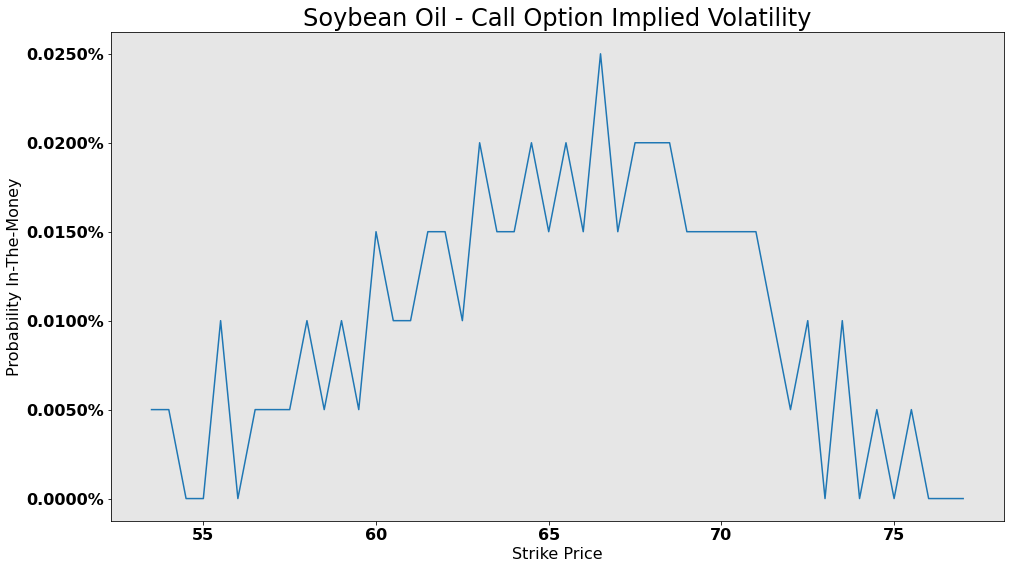

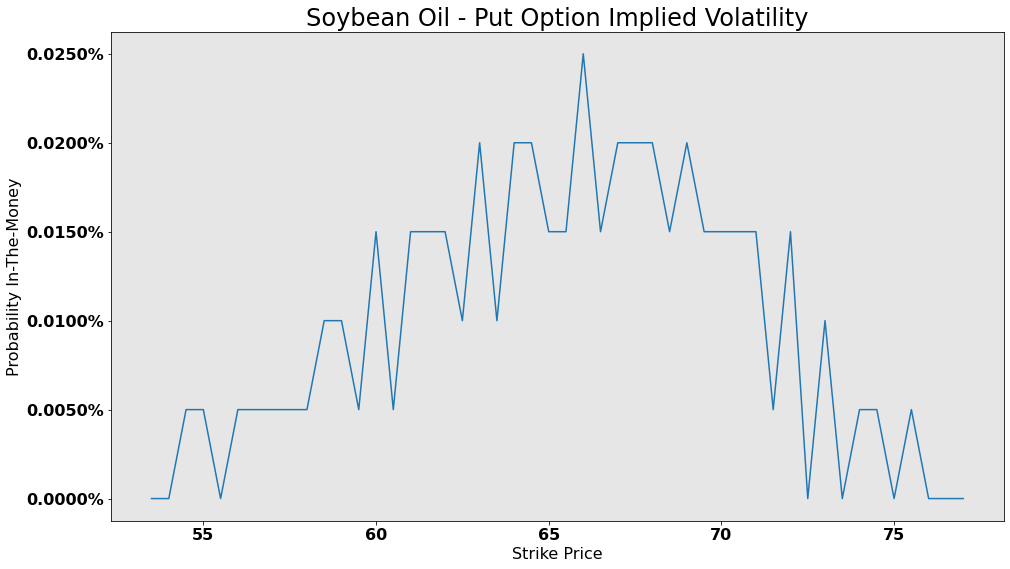

,Strike Price,Probability,Type
0,53.5,5.000000e-03,Call
1,54.0,5.000000e-03,Call
2,54.5,0.000000e+00,Call
3,55.0,1.776357e-15,Call
4,55.5,1.000000e-02,Call
...,...,...,...
91,75.0,0.000000e+00,Put
92,75.5,5.000000e-03,Put
93,76.0,0.000000e+00,Put
94,76.5,0.000000e+00,Put


In [45]:
# Calculate probabilities from strike and price, then visualize p
def get_probs(df, strikes_name, prices_name, commodity):

    def visualize_pdf(strikes, probs):
        import matplotlib.pyplot as plt
        import matplotlib.ticker as mtick
        plt.rcParams.update({'font.size': 16, 'font.weight': 'bold', 'figure.figsize': (16,9)})

        fig, ax = plt.subplots(figsize=(16,9))
        ax.plot(strikes, probs)
        ax.set_title(f'{commodity} - {t} Option Implied Volatility',fontsize = 24)
        ax.set_xlabel('Strike Price')
        ax.set_ylabel('Probability In-The-Money')
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
        ax.set_facecolor('#E6E6E6')
        plt.show()

    # Calculate probabilities and visualize PDF for Call and Put options
    for t in df.Type.unique():
        dfo=df[df.Type == t]
        strikes=dfo[strikes_name]
        prices=dfo[prices_name]

        # Window the df to have one strike per row, but the 3 prices near it for each butterfly
        import numpy as np
        strike, l_price, m_price, u_price = [], [], [], []
        for i in np.arange(0,len(strikes)):
            if (i>0) & (i<len(strikes)-1):
                l_price.append(prices.iloc[i-1])
                strike.append(strikes.iloc[i])
                m_price.append(prices.iloc[i])
                u_price.append(prices.iloc[i+1])
    
        # For each strike price, calculate the probability, p
        s, p = [], []
        for i in np.arange(0,len(strike)):
            sp = strike[i]
            lp = l_price[i]
            mp = m_price[i]
            up = u_price[i]

            # Calculate the probability a future expires at the target price
            prob = lp - (2 * mp) + up
            s.append(sp)
            p.append(prob)
        visualize_pdf(s,p)

        probs = pd.DataFrame({'Strike Price': s,'Probability':p})
        probs=probs.dropna(axis=0)

        if t=='Call':
            c_probs = probs
        elif t=='Put':
            p_probs = probs
    # Merge data
    c_probs['Type']='Call'
    p_probs['Type']='Put'
    sbo_probs = pd.concat([c_probs,p_probs], ignore_index=True)
    return(sbo_probs)

# Filter Call Strikes and Prices
sbo_probs = get_probs(sbo, 'Strike Price', 'Last', 'Soybean Oil')
sbo_probs

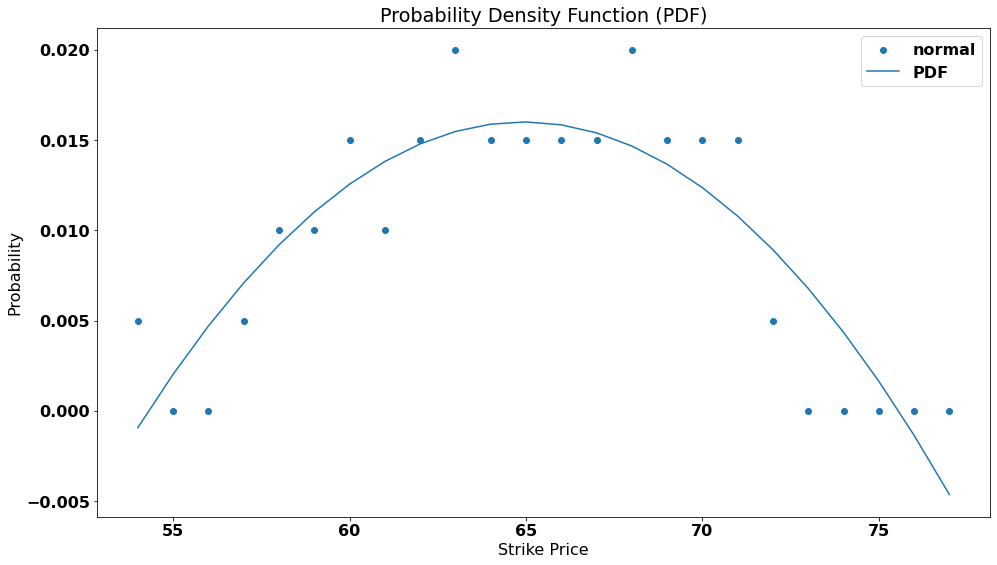

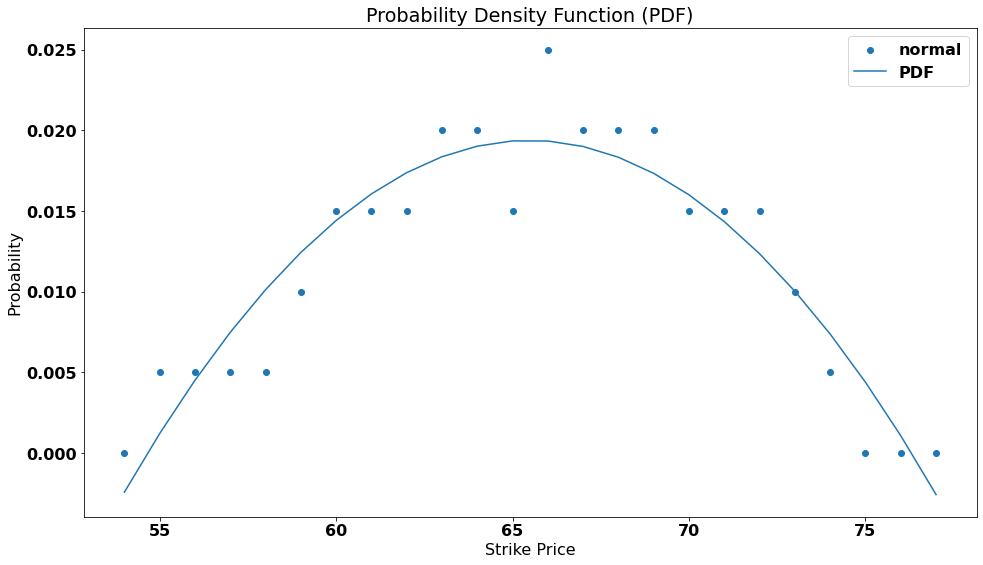

,Strike Price,Probability,Type
1,54.0,5.000000e-03,Call
3,55.0,1.776357e-15,Call
5,56.0,0.000000e+00,Call
7,57.0,5.000000e-03,Call
9,58.0,1.000000e-02,Call
11,59.0,1.000000e-02,Call
13,60.0,1.500000e-02,Call
15,61.0,1.000000e-02,Call
17,62.0,1.500000e-02,Call
19,63.0,2.000000e-02,Call


In [46]:
def get_pdf(df, remove_outliers=True, derivatives=0):
    if remove_outliers:
            # Remove Outliers
            df = df[df['Strike Price'] == df['Strike Price'].astype(int)]

    # Calcuate for Call and/or Put
    for t in df.Type.unique():
        dfo = df[df.Type == t]

        # Calculate Cubic Spline
        x = dfo['Strike Price']
        y = dfo['Probability']

        from sklearn.preprocessing import PolynomialFeatures
        polynomial_features= PolynomialFeatures(degree=2)
        import numpy as np
        xp = polynomial_features.fit_transform(np.array(x).reshape(-1,1))
        import statsmodels.api as sm
        model = sm.OLS(y, xp).fit()
        pdf = model.predict(xp)

        # Plot
        import matplotlib.pyplot as plt
        plt.scatter(x, y, marker='o', label='normal')
        plt.plot(x, pdf, label='PDF')
        plt.legend()
        plt.title('Probability Density Function (PDF)')
        plt.xlabel('Strike Price')
        plt.ylabel('Probability')
        plt.show()

        if t=='Call':
            c_pdf = pdf
        elif t=='Put':
            p_pdf = pdf
    dfi = pd.DataFrame({'Strike Price':x, 'Call PDF':c_pdf, 'Put PDF':p_pdf})
    df.merge(dfi, 'left')
    return(df)

sbo_pdf = get_pdf(sbo_probs, True)
sbo_pdf